In [2]:
# Analysing models linear and ridge regressions

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [6]:
file_path = "cleaned_customer_shopping_data.csv"  # Ensure the correct file path
df = pd.read_csv(file_path)

In [8]:
# Convert 'invoice_date' to datetime format
df['invoice_date'] = pd.to_datetime(df['invoice_date'], errors='coerce')

In [10]:
# Create a new feature for total spending
df['total_spent'] = df['quantity'] * df['price']

In [12]:
# Select features and target variable
features = ['age', 'quantity', 'price']  # Predictors
target = 'total_spent'  # Target variable
X = df[features]
y = df[target]


In [14]:
# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Initialize and train Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)


LinearRegression()

In [18]:
# Make predictions
linear_pred = linear_reg.predict(X_test)

In [20]:

# Evaluate Linear Regression performance
mae = mean_absolute_error(y_test, linear_pred)
mse = mean_squared_error(y_test, linear_pred)
r2 = r2_score(y_test, linear_pred)

print("Linear Regression Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2 Score): {r2:.4f}")

Linear Regression Performance:
Mean Absolute Error (MAE): 703.68
Mean Squared Error (MSE): 995368.07
R-squared (R2 Score): 0.9457


In [23]:
#Ridge Regression

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [27]:
# Create a new feature for total spending
df['total_spent'] = df['quantity'] * df['price']

In [29]:
# Select features and target variable
features = ['age', 'quantity', 'price']  # Predictors
target = 'total_spent'  # Target variable

X = df[features]
y = df[target]

In [31]:
# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Initialize and train Ridge Regression model
ridge_reg = Ridge(alpha=1.0)  # Regularization strength = 1.0
ridge_reg.fit(X_train, y_train)

Ridge()

In [35]:
# Make predictions
ridge_pred = ridge_reg.predict(X_test)

Ridge Regression Performance:
Mean Absolute Error (MAE): 703.68
Mean Squared Error (MSE): 995367.97
R-squared (R2 Score): 0.9457
Age: 0.4611
Quantity: 440.1980
Price: 4.0827


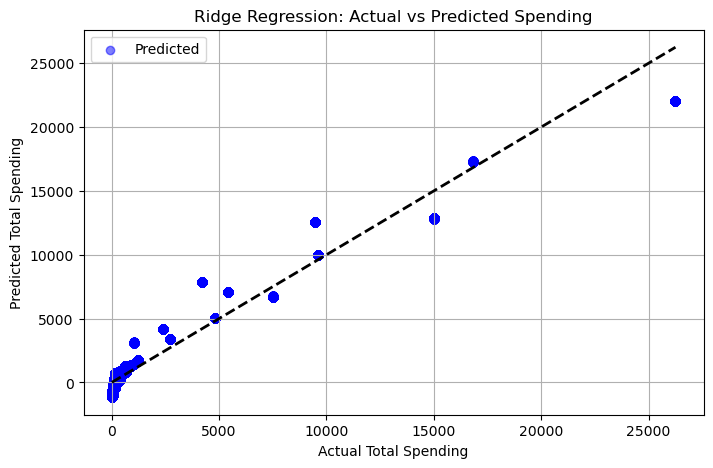

In [37]:
# Evaluate Ridge Regression performance
mae = mean_absolute_error(y_test, ridge_pred)
mse = mean_squared_error(y_test, ridge_pred)
r2 = r2_score(y_test, ridge_pred)

print("Ridge Regression Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2 Score): {r2:.4f}")
feature_importance = np.abs(ridge_reg.coef_)
feature_names = ['Age', 'Quantity', 'Price']
for name, importance in zip(feature_names, feature_importance):
    print(f"{name}: {importance:.4f}")

# Plot Actual vs Predicted Values for Ridge Regression
plt.figure(figsize=(8, 5))
plt.scatter(y_test, ridge_pred, alpha=0.5, color="blue", label="Predicted")
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color="black", linewidth=2)  # Identity line
plt.xlabel("Actual Total Spending")
plt.ylabel("Predicted Total Spending")
plt.title("Ridge Regression: Actual vs Predicted Spending")
plt.legend()
plt.grid()
plt.show()

In [149]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate Linear Regression
linear_mae = mean_absolute_error(y_test, linear_pred)
linear_mse = mean_squared_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)

# Evaluate Ridge Regression
ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

# Evaluate Polynomial Regression
poly_mae = mean_absolute_error(y_test, poly_pred)
poly_mse = mean_squared_error(y_test, poly_pred)
poly_r2 = r2_score(y_test, poly_pred)

# Display results
import pandas as pd
regression_results = pd.DataFrame({
    "Model": ["Linear Regression", "Ridge Regression", "Polynomial Regression"],
    "MAE": [linear_mae, ridge_mae, poly_mae],
    "MSE": [linear_mse, ridge_mse, poly_mse],
    "R² Score": [linear_r2, ridge_r2, poly_r2]
})

import ace_tools as tools
tools.display_dataframe_to_user(name="Regression Model Performance", dataframe=regression_results)


ModuleNotFoundError: No module named 'ace_tools'